# Melanoma Prediction

## Dataset Link

https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset/data

## Loading library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [4]:
print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 2.7.0


### Loading training data

In [22]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 9702 files belonging to 2 classes.


### Loading validation data

In [23]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2089 files belonging to 2 classes.


## Building Model

In [24]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

'filters' is the amount of convolution layers used to create the feature map, larger number is more resolution  <br> 
'kernel_size' is the dimensions of the 'scan' used to create the convolution matrix  <br> 
'padding' used to force feature plot output to be the same as the input image size <br> 
'activation' <br> 
'input_shape'  <br> 
'pool_size' is the dimensions of the 'scan' used to generate the max pooling <br> 
'strides' is the distances in between scans to generate the pooling matrix

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.BatchNormalization())

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.BatchNormalization())

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.BatchNormalization())

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.BatchNormalization())

In [29]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compile the model

In [30]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 111, 111, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 111, 111, 64)      18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)     

## Model Training

In [32]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
304/304 [==============================] - 107s 348ms/step - loss: 0.7845 - accuracy: 0.8118 - val_loss: 0.6845 - val_accuracy: 0.7362
Epoch 2/10
304/304 [==============================] - 106s 348ms/step - loss: 0.3359 - accuracy: 0.8716 - val_loss: 0.4286 - val_accuracy: 0.8511
Epoch 3/10
304/304 [==============================] - 106s 350ms/step - loss: 0.2594 - accuracy: 0.8933 - val_loss: 0.5154 - val_accuracy: 0.8147
Epoch 4/10
304/304 [==============================] - 106s 349ms/step - loss: 0.2438 - accuracy: 0.8986 - val_loss: 0.4404 - val_accuracy: 0.8640
Epoch 5/10
304/304 [==============================] - 106s 349ms/step - loss: 0.2021 - accuracy: 0.9157 - val_loss: 0.5063 - val_accuracy: 0.8492
Epoch 6/10
304/304 [==============================] - 106s 349ms/step - loss: 0.1994 - accuracy: 0.9207 - val_loss: 0.4278 - val_accuracy: 0.8506
Epoch 7/10
304/304 [==============================] - 106s 349ms/step - loss: 0.1500 - accuracy: 0.9408 - val_loss: 0.5371 -

### Model Evaluation

In [33]:
train_loss,train_acc = cnn.evaluate(training_set)
print(train_loss,train_acc)

304/304 [==============================] - 31s 102ms/step - loss: 0.0595 - accuracy: 0.9801
0.05954987183213234 0.9801071882247925


In [34]:
val_loss,val_acc = cnn.evaluate(validation_set)
print(val_loss,val_acc)

66/66 [==============================] - 7s 102ms/step - loss: 0.4812 - accuracy: 0.8688
0.4812373220920563 0.8688367605209351


### Model Saving

In [62]:
cnn.save("model_3.h5")
cnn.save("model_3.keras")

In [35]:
training_history.history

{'loss': [0.7845300436019897,
  0.33589479327201843,
  0.2594371736049652,
  0.24378518760204315,
  0.20207953453063965,
  0.19935765862464905,
  0.15000975131988525,
  0.12162147462368011,
  0.10160540789365768,
  0.08568228781223297],
 'accuracy': [0.8117913603782654,
  0.8715728521347046,
  0.8933209776878357,
  0.8985776305198669,
  0.9156875014305115,
  0.9207379817962646,
  0.9408369660377502,
  0.951556384563446,
  0.960214376449585,
  0.9675324559211731],
 'val_loss': [0.6845345497131348,
  0.42862942814826965,
  0.5153737664222717,
  0.4403780996799469,
  0.506311297416687,
  0.4278021454811096,
  0.5370655655860901,
  0.5210495591163635,
  0.46829816699028015,
  0.4812374413013458],
 'val_accuracy': [0.7362374067306519,
  0.8511249423027039,
  0.8147438764572144,
  0.8640497922897339,
  0.8492101430892944,
  0.8506462574005127,
  0.8621349930763245,
  0.8492101430892944,
  0.8688367605209351,
  0.8688367605209351]}

In [37]:
# Save training history
import json
with open("model_3_history.json","w") as f:
    json.dump(training_history.history,f)

## Model visualization

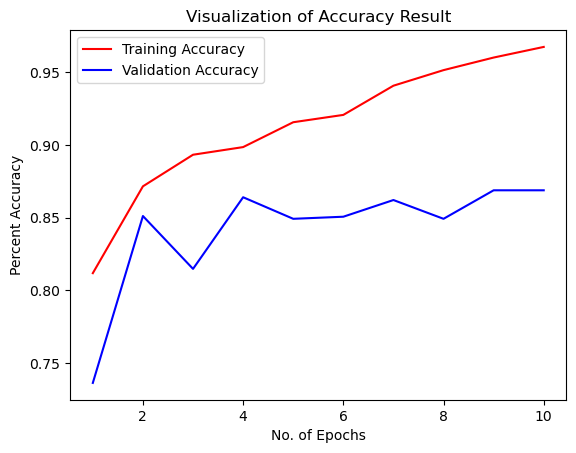

In [63]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Percent Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

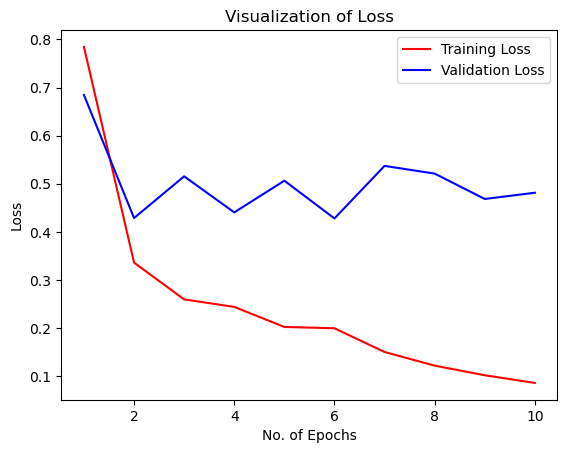

In [39]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Visualization of Loss')
plt.legend()
plt.show()

In [40]:
class_name = validation_set.class_names

In [41]:
print(class_name)

['Benign', 'Malignant']


## Testing metrics

In [48]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2089 files belonging to 2 classes.


In [50]:
y_pred = cnn.predict(test_set)
predicted_categories = (y_pred > 0.5).astype(int).flatten()

In [53]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories = true_categories.numpy().astype(int).flatten()  # Convert tensor to numpy array and flatten

In [51]:
predicted_categories

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
true_categories

array([0, 0, 0, ..., 1, 1, 1])

In [55]:
# Import sklearn metrics for evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
# Compute confusion matrix
cm = confusion_matrix(true_categories, predicted_categories)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1012   85]
 [ 189  803]]


In [57]:
# Compute classification report
report = classification_report(true_categories, predicted_categories, target_names=['Benign', 'Malignant'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Benign       0.84      0.92      0.88      1097
   Malignant       0.90      0.81      0.85       992

    accuracy                           0.87      2089
   macro avg       0.87      0.87      0.87      2089
weighted avg       0.87      0.87      0.87      2089



### Confusion Matrix Visualization

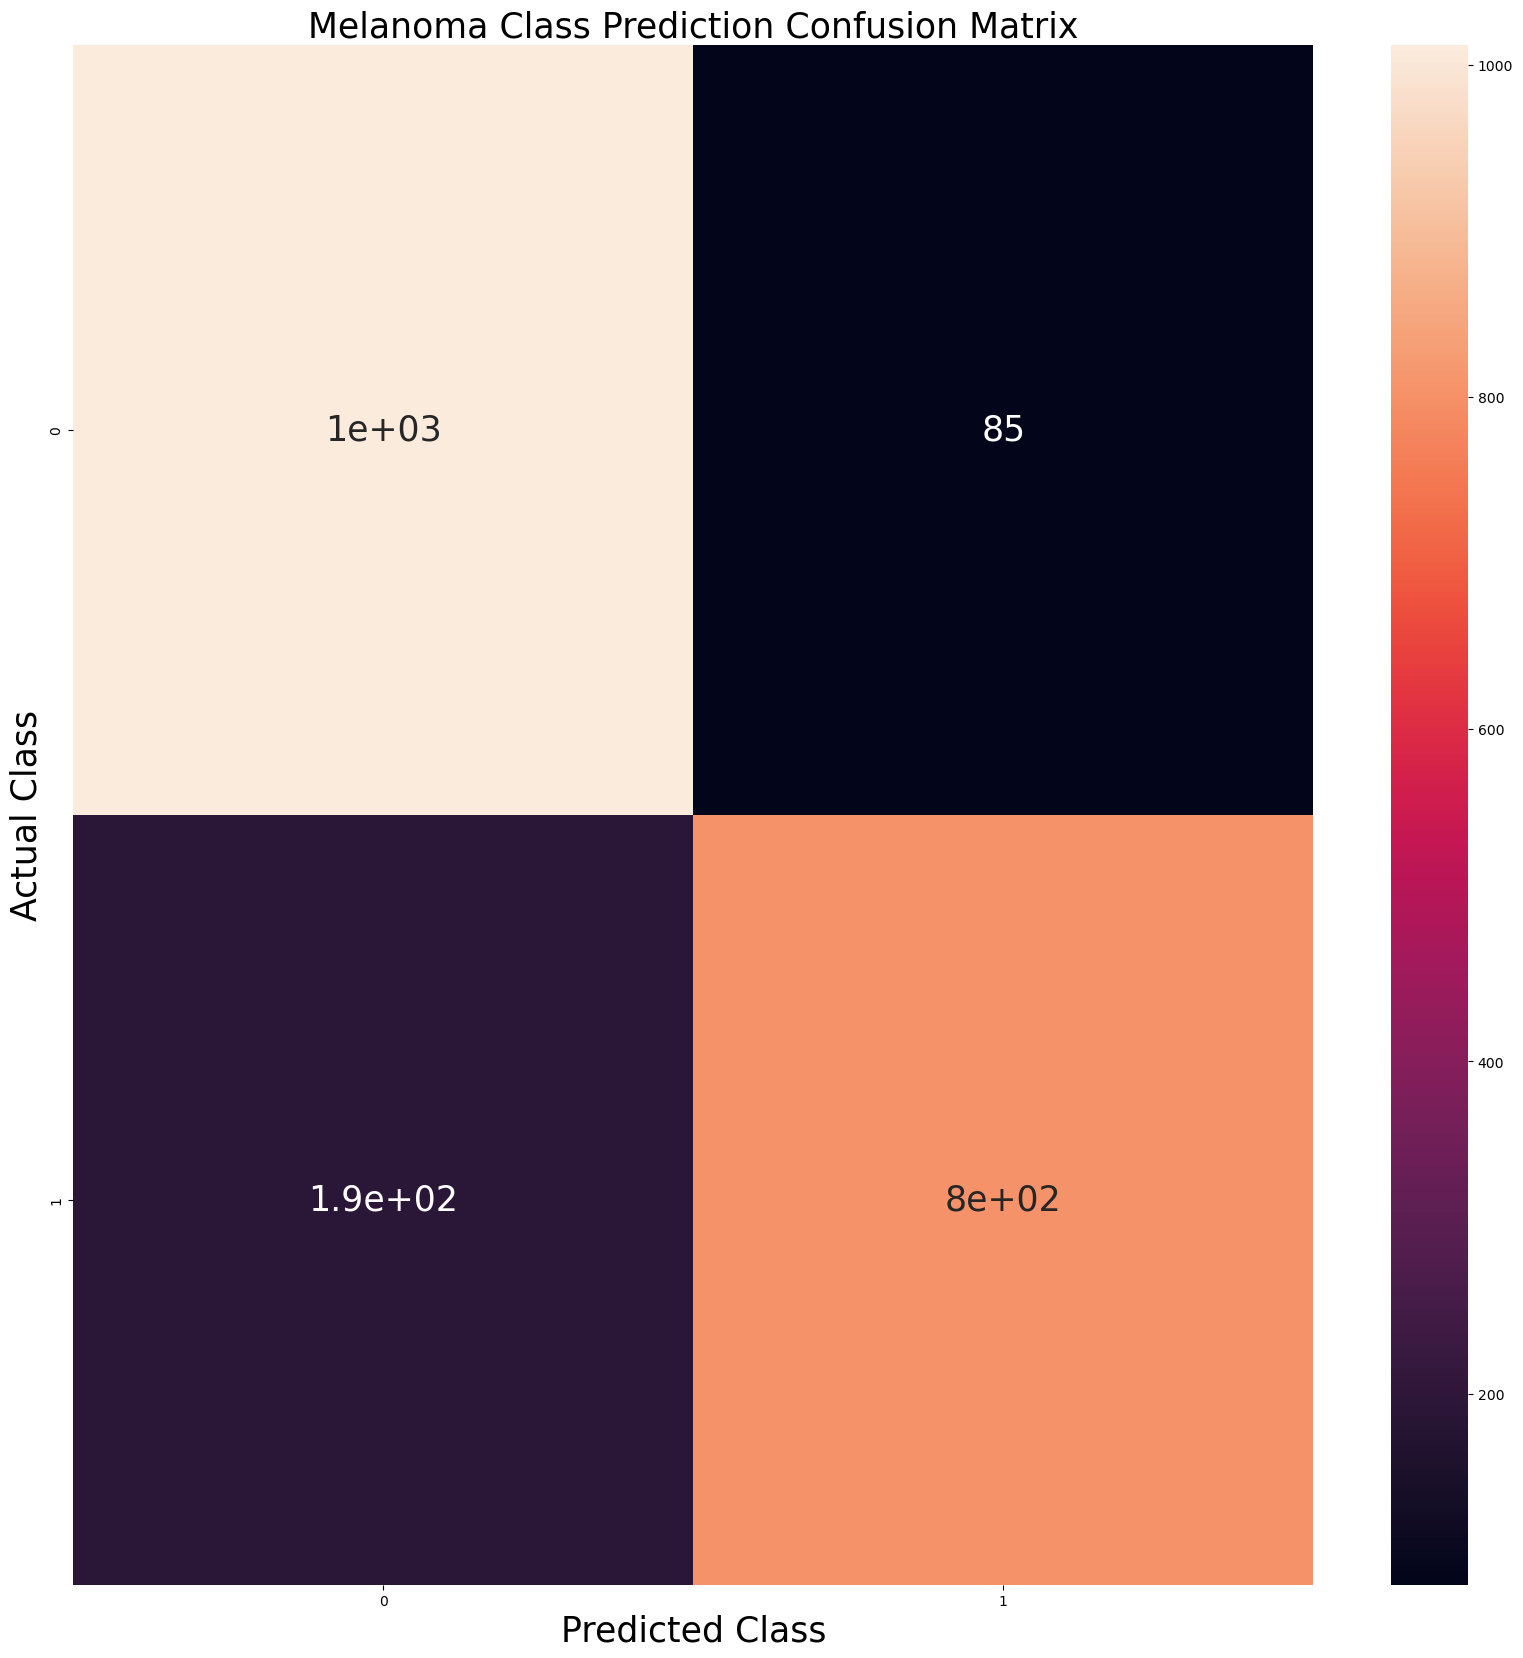

In [61]:
plt.figure(figsize=(20, 20))
sns.heatmap(cm,annot=True,annot_kws={"size": 25})

plt.xlabel('Predicted Class',fontsize = 25)
plt.ylabel('Actual Class',fontsize = 25)
plt.title('Melanoma Class Prediction Confusion Matrix',fontsize = 25)
plt.show()